# Advertising Prediction
## Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Exploratory Data Analysis (EDA)</li>
<li> Feature Transformations</li>
<li>Building Model</li>
<li>Evaluating Model Performance</li>
<li>Conclusion</li>
</ul>

# Introduction

> We have many data that resulted in the user clicking on the advertisement and also not clicking on the advertisement. In this project, my goal is to predict that the user will click on the advertisement or not, through the data available to me.

# Importing The Libraries

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[7,7]},font_scale=1.1)

# Reading The Data

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
#Display part of the data
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Data Inspection

In [4]:
#Shape of the data
df.shape

(1000, 10)

In [5]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


- No.of categorical features: 4
- No.of numerical features: 6
- Data hasn't missing values

In [6]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

- Data are clean

In [7]:
#Data description
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis (EDA)

In [8]:
def dstplt(data,col,bins=None):
    '''
    This function plots the distribution of the data.
    INPUT:
    data: str. The name of the dataset.
    col: str. The name of the feature.
    bins: int. Number of bins into the shape.
    OUTPUT:
    Distplot shows the distribution of the entered data.
    '''
    sns.distplot(data[col],bins=bins)
    plt.title(col.title()+" Distribution")
    plt.show()

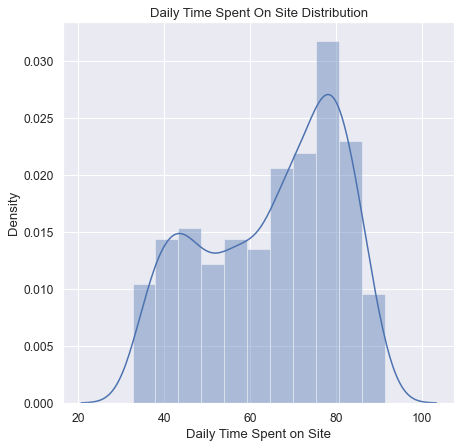

In [9]:
dstplt(df,'Daily Time Spent on Site')

- Daily time spent on site range almost from 30 minutes to 90 minutes.

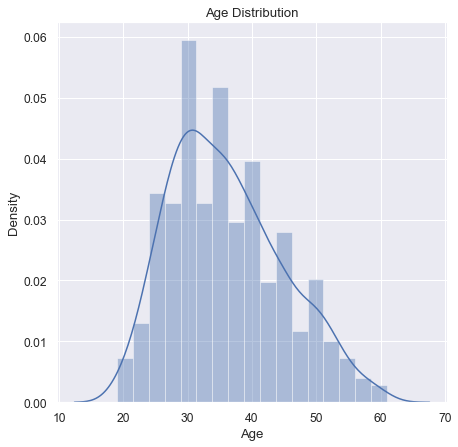

In [10]:
dstplt(df,"Age")

- Ranges of the age almost between 20 and 62 years old
- Most people have 30 years old

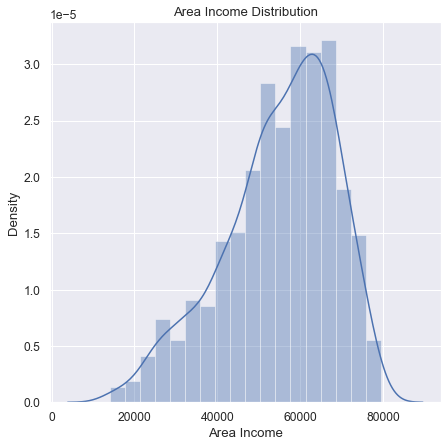

In [11]:
dstplt(df,'Area Income')

- Ranges of the area income almost between 14000 and 80000

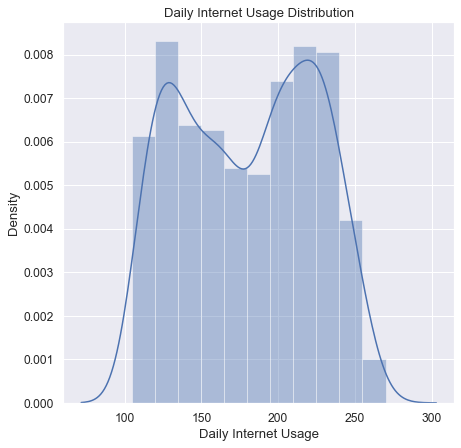

In [14]:
dstplt(df,'Daily Internet Usage')

- Daily internet usage ranges almost from 105 to 270 minutes

In [70]:
def cntplt(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing the counts of observations in each categorical value.
    INPUT:
    data: DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Countplot represent the counts of observations in each categorical value.
    '''
    sns.countplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.ylabel("Count")
    plt.title(title.title())
    plt.show()

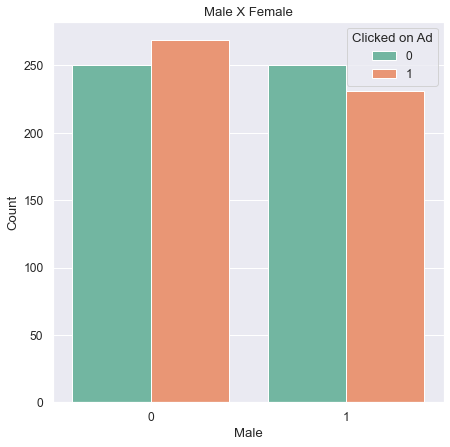

In [76]:
cntplt(df,"Male","Set2","Male x Female",hue="Clicked on Ad")

- Most females clicked on ad.
- Most Males didn't click on ad.

In [51]:
#Converting object to datetime
df["Timestamp"]=pd.to_datetime(df["Timestamp"],format="%Y-%m-%d %H:%M:%S",errors="coerce")

In [63]:
def season(timestamp):
    '''
    This function for getting the season by parsing the timestamp.
    INPUT:
    timestamp: datetime. The timestamp.
    OUTPUT:
    The output is one of the seasons.
    '''
    if timestamp.month in [12,1,2]:
        return "Winter"
    elif timestamp.month in [3,4,5]:
        return "Spring"
    elif timestamp.month in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"
def period(timestamp):
    '''
    This function for getting the period by parsing the timestamp.
    INPUT:
    timestamp: datetime. The timestamp.
    OUTPUT:
    The output is one of the periods.
    '''
    if timestamp.hour in range(12):
        return "Morning"
    else:
        return "Evening"

In [64]:
#Adding season and period to the dataset
df["Season"]=df["Timestamp"].apply(season)
df["Period"]=df["Timestamp"].apply(period)

In [65]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Season,Period
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Spring,Morning
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Spring,Morning
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Spring,Evening
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Winter,Morning
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Summer,Morning


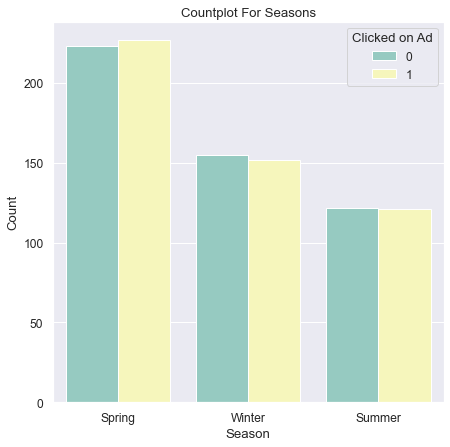

In [77]:
cntplt(df,"Season","Set3","Countplot for seasons",hue="Clicked on Ad")

- Most users clicked on ad on spring.

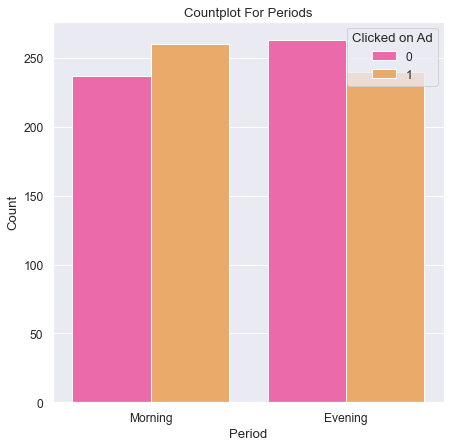

In [83]:
cntplt(df,"Period","spring","Countplot for periods",hue="Clicked on Ad")

- Most users clicked on ad on morning.

In [88]:
def bxplot(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing distributions with respect to categories.
    INPUT:
    data: DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Boxplot represent the distributions with respect to categories.
    '''
    sns.boxplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.title(title.title())
    plt.show()

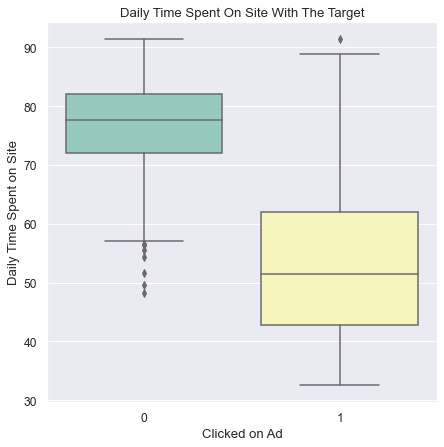

In [93]:
bxplot(df,"Clicked on Ad",y="Daily Time Spent on Site",palette="Set3",title="Daily Time Spent on Site with the target")

- Some people spent alot of time on site almost more than 90 minutes but they didn't click on ad while another some people spent almost 35 minutes and they clicked ads. I can say clicking on ads it doesn't require long time spent on site.


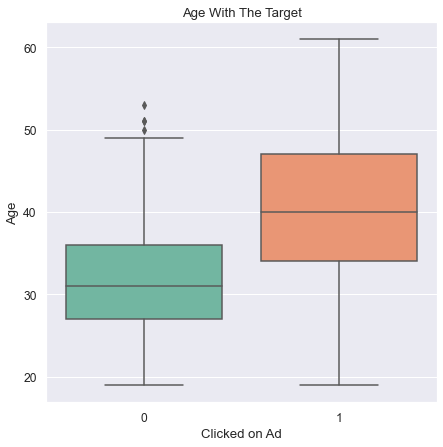

In [99]:
bxplot(df,"Clicked on Ad",y="Age",palette="Set2",title="Age with the target")

- People whose they are almost at the age of 50 to 60 they give a big attention to ads.

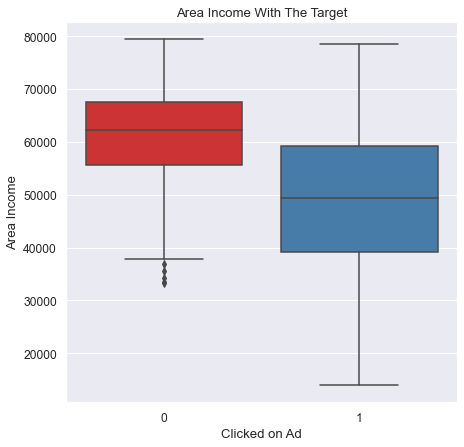

In [100]:
bxplot(df,"Clicked on Ad",y='Area Income',palette="Set1",title="Area income with the target")

- Clicking on ads doesn't require a very high area income, it's depending on this ad suitable for the person or not.

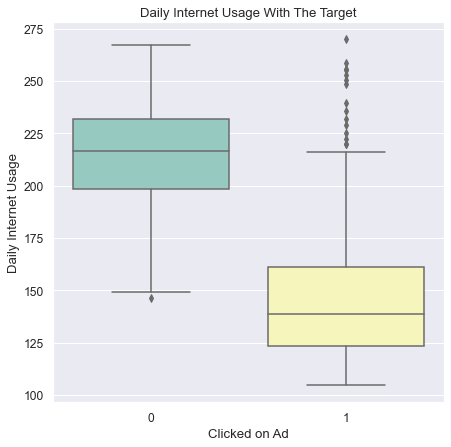

In [102]:
bxplot(df,"Clicked on Ad",y='Daily Internet Usage',palette="Set3",title="Daily internet usage with the target")

- People whose they use high amount of internet per day almost from 225 to 270 minutes they didn't click on ad, in the other side some people uses less amount of internet but they click on ads.

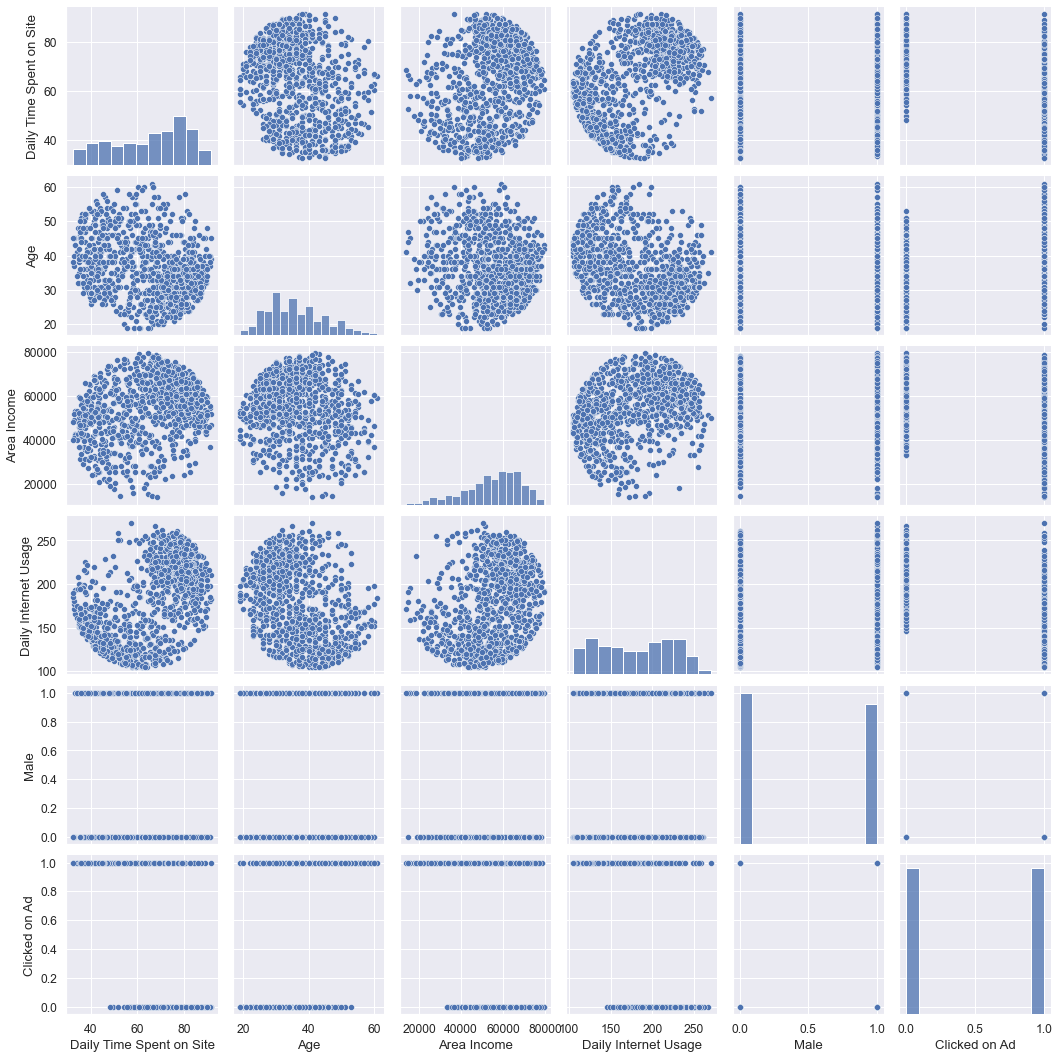

In [104]:
#Pairplot for the numeric data
sns.pairplot(df);

# Feature Transformations

In [109]:
#Splitting data to x and y
x=df.drop(['Ad Topic Line', 'City','Country','Timestamp', 'Clicked on Ad'],axis=1)
y=df["Clicked on Ad"]

In [112]:
#Getting the dummies
x=pd.get_dummies(x,columns=["Season","Period"],drop_first=True)

In [113]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Season_Summer,Season_Winter,Period_Morning
0,68.95,35,61833.90,256.09,0,0,0,1
1,80.23,31,68441.85,193.77,1,0,0,1
2,69.47,26,59785.94,236.50,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,1,1
4,68.37,35,73889.99,225.58,0,1,0,1


In [114]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [116]:
#Applying standard scaling
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

# Building Model

In [245]:
#Applying random forest classifier model
model=RandomForestClassifier()
#Applying cross validation
cross_val=cross_validate(model,x,y,n_jobs=-1,cv=10,return_train_score=True)

In [246]:
cross_val

{'fit_time': array([0.25664711, 0.24102664, 0.25564861, 0.23903131, 0.25365305,
        0.25265479, 0.25165796, 0.25232077, 0.14056444, 0.14056444]),
 'score_time': array([0.01562214, 0.01562047, 0.01562214, 0.01562047, 0.01562214,
        0.01562214, 0.01562214, 0.01562095, 0.0156157 , 0.0156157 ]),
 'test_score': array([1.  , 0.94, 0.97, 0.96, 1.  , 0.99, 0.96, 0.94, 0.97, 0.94]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

# Evaluating Model Performance

In [249]:
print("Training Score: ",cross_val["train_score"].mean())
print("Testing Score: ",cross_val["test_score"].mean())

Training Score:  1.0
Testing Score:  0.967


In [256]:
#Obtaining the predicted values
y_pred=cross_val_predict(model,x,y,n_jobs=-1,cv=10)

In [259]:
#Confusion Matrix
confusion_matrix(y,y_pred)

array([[481,  19],
       [ 20, 480]], dtype=int64)

# Conclusion

> - EDA gives a report about the different features of the data with the target.
> - I dropped the useless features from the x.
> - Getting the dummies very important for taking a real benefits from categorical data during machine learning model.
> - Standard scaler helps to get standardized distribution, and gives us good results.
> - I used in this project RandomForestClassifier model.